In [53]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [65]:
## Summary
# Create dataset
# Create a linear model and a loss function
# Create a training loop including backpropagation and parameter update
# Use existing optimizers in pytorch
# Split the dataset

# Create dataset

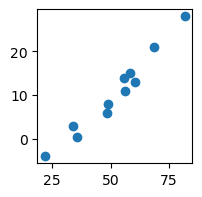

In [54]:
# Dataset for linear regression, y=wx+b
# Targets (y)
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
# Inputs (x)
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2)) # Width 2 inches, height 2 inches
ax.scatter(t_u, t_c)

# Rescaling the input for better gradient computation
# Some optimizers are more sensitive to the scale of the data, e.g. the stochastic gradient descent
t_un = 0.1 * t_u

# Create a linear model and a loss function 

In [55]:
def model(t_u, w, b):
    """
    t_u: input tensor, currently 1D
    w: weight parameter, 0D tensor
    b: bias, 0D tensor
    """
    return w * t_u + b

def loss_fn(t_p, t_c):
    """
    t_p: predicted values
    t_c: true values
    """
    # Return the mean of the squared difference between predictions and targets
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [56]:
## Test the model and the loss function

# Initialize weight and bias as the two elements of a single tensor
# This will be convenient when we do the gradient descent, 
    # where we only need a single line to update both parameters
# "requires_grad=True" causes all tensors resulted from 'params' 
    # to create computation graph to compute gradient
params = torch.tensor([1.0, 0.0], requires_grad=True)


# Compute the loss 
loss = loss_fn(model(t_u, *params), t_c)
# Backpropagation
loss.backward()
# Show the gradient of 'loss' wrt the 'params'.
# Note that the gradient is stored at 'params', not 'loss'
print(params.grad)

# Setting the gradient to be zero for further gradient calculation
# For example, if there is another tensor T created from 'params' 
    # and we compute its gradient by T.backward(),
    # then the gradient will be added (accumulated) to the existing gradient wrt 'loss'
# Thus, it is a common practice to reset gradient to zero before each back propagation
if params.grad is not None:
    params.grad.zero_()
    print(params.grad)



tensor([4517.2969,   82.6000])
tensor([0., 0.])


# Training

In [57]:
# Training
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    """
    n_epochs: number of epochs
    learning_rate: learning rate
    params: parameters
    t_u: input (x in the dataset)
    t_c: targets (y in the dataset)
    """
    for epoch in range(1, n_epochs + 1):
        
        # Compute the loss
        loss = loss_fn(model(t_u, *params), t_c)

        # Reset gradient to zero
        if params.grad is not None:
            params.grad.zero_()
        # Backpropagation
        loss.backward()
        # Update the parameters
        # We simply change the parameter values, not create a new tensor
        # We can check that params.grad.requires_grad is False.
        # Without the 'torch.no_grad()' context, 'params -= learning_rate * params.grad' would raise an error
        with torch.no_grad():
            params -= learning_rate * params.grad
        # Show the loss during training
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss {float(loss)}')
    return params

# Note that the rescaled input (t_un) is used
training_loop(n_epochs = 5000, learning_rate = 1e-2, 
              params = torch.tensor([1.0, 0.0], requires_grad=True), t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860115051269531
Epoch 1000, Loss 3.828537940979004
Epoch 1500, Loss 3.092191219329834
Epoch 2000, Loss 2.957697868347168
Epoch 2500, Loss 2.933133840560913
Epoch 3000, Loss 2.9286484718322754
Epoch 3500, Loss 2.9278297424316406
Epoch 4000, Loss 2.9276793003082275
Epoch 4500, Loss 2.927651882171631
Epoch 5000, Loss 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

# Use existing optimizers

In [58]:
# Show the optimization alg in the torch.optim module
print( dir(optim) )

['ASGD', 'Adadelta', 'Adafactor', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'LBFGS', 'NAdam', 'Optimizer', 'RAdam', 'RMSprop', 'Rprop', 'SGD', 'SparseAdam', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_adafactor', '_functional', 'lr_scheduler', 'swa_utils']


In [59]:
# stochastic gradient descent
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
# Note that 'params' must be put in a list (in general, this argument should be an iterable)
optimizer = optim.SGD([params], lr=learning_rate)

## Test the optimizer
# Evaluate loss
loss = loss_fn(model(t_u, *params), t_c)
# Compute derivatives
# Before each backpropagation, reset gradient to zero
optimizer.zero_grad()
loss.backward()
# Update parameters
# This is the same as manually updating the parameters
# by substracting learning_rate * gradient
optimizer.step()
print(params)

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)


In [60]:
# Training with SGD
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        
        loss = loss_fn(model(t_u, *params), t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss {float(loss)}')
    return params

params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=1e-2)
n_epochs = 5000
training_loop(n_epochs, optimizer, params, t_un, t_c)

Epoch 500, Loss 7.860115051269531
Epoch 1000, Loss 3.828537940979004
Epoch 1500, Loss 3.092191219329834
Epoch 2000, Loss 2.957697868347168
Epoch 2500, Loss 2.933133840560913
Epoch 3000, Loss 2.9286484718322754
Epoch 3500, Loss 2.9278297424316406
Epoch 4000, Loss 2.9276793003082275
Epoch 4500, Loss 2.927651882171631
Epoch 5000, Loss 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [61]:
# Using the Adam optimizer
# This optimizer is less sensitive to the scale difference between parameters
params = torch.tensor([1.0, 0.0], requires_grad=True)
# Use a larger learning rate
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)
# Use less epochs
n_epochs = 2000
# Note that t_u is used instead of t_un
training_loop(n_epochs, optimizer, params, t_u, t_c)

Epoch 500, Loss 7.612898349761963
Epoch 1000, Loss 3.086700439453125
Epoch 1500, Loss 2.928579092025757
Epoch 2000, Loss 2.9276442527770996


tensor([  0.5367, -17.3021], requires_grad=True)

# Splitting the dataset

In [62]:
# Splitting the dataset
n_samples = t_u.shape[0]
print("Number of samples", n_samples)
n_val = int(0.2 * n_samples)
print("Validation set size", n_val)
# Shuffling the indices of the dataset. The result is a tensor
shuffled_indices = torch.randperm(n_samples)
# Indices of training and validating sets
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

# Training set
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
# Validation set
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

# Rescaled training set
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

Number of samples 11
Validation set size 2


In [63]:
# Update the training loop
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                    train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        # Forward propagation (computing the loss)
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        # Evaluate the loss on the validation set.
        # Since no computation graph is required, we turn off autograd
        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            # Within this context, val_loss.requires_grad should be False
            # assert condition raises an error if the condition is not satisfied
            assert val_loss.requires_grad == False

        # Back propagation
        optimizer.zero_grad()
        train_loss.backward()
        # Update the parameters
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Validation loss {val_loss.item():.4f}")
    return params

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs = 3000, optimizer = optimizer, params = params, 
                train_t_u = train_t_un, val_t_u = val_t_un,
                train_t_c = train_t_c, val_t_c = val_t_c)

Epoch 1, Training loss 98.0567, Validation loss 0.7488
Epoch 2, Training loss 37.8207, Validation loss 13.0239
Epoch 3, Training loss 30.7609, Validation loss 24.6283
Epoch 500, Training loss 7.5900, Validation loss 9.0263
Epoch 1000, Training loss 3.2741, Validation loss 5.7568
Epoch 1500, Training loss 2.4474, Validation loss 5.6629
Epoch 2000, Training loss 2.2891, Validation loss 5.8779
Epoch 2500, Training loss 2.2588, Validation loss 6.0210
Epoch 3000, Training loss 2.2530, Validation loss 6.0931


tensor([  5.4576, -17.7181], requires_grad=True)

In [64]:
# Another way to turn on/off autograd
def calc_forward(t_u, t_c, is_train):
    # If is_train==False, turn on autograd, otherwise turn it off
    with torch.set_grad_enabled(is_train):
        loss = loss_fn(model(t_u, *params), t_c)
    return loss


# Update the training loop
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                    train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        # Forward propagation (computing the loss)
        train_loss = calc_forward(train_t_u, train_t_c, True)
        val_loss = calc_forward(val_t_u, val_t_c, False)
        
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Validation loss {val_loss.item():.4f}")
    return params

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs = 3000, optimizer = optimizer, params = params, 
                train_t_u = train_t_un, val_t_u = val_t_un,
                train_t_c = train_t_c, val_t_c = val_t_c)

Epoch 1, Training loss 98.0567, Validation loss 0.7488
Epoch 2, Training loss 37.8207, Validation loss 13.0239
Epoch 3, Training loss 30.7609, Validation loss 24.6283
Epoch 500, Training loss 7.5900, Validation loss 9.0263
Epoch 1000, Training loss 3.2741, Validation loss 5.7568
Epoch 1500, Training loss 2.4474, Validation loss 5.6629
Epoch 2000, Training loss 2.2891, Validation loss 5.8779
Epoch 2500, Training loss 2.2588, Validation loss 6.0210
Epoch 3000, Training loss 2.2530, Validation loss 6.0931


tensor([  5.4576, -17.7181], requires_grad=True)